In [1]:
import numpy as np
import pandas as pd
import gc

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from load_data import load_data

dataDir = 'C:\\Users\simin\OneDrive\Documents\Kaggle\Credit Default\data/'

In [2]:
df = load_data(dataDir)

Data already existed.


### Train Models

In [12]:
#Validation function
n_folds = 5

df_train = df[df['TARGET'].notnull()]
df_test = df[df['TARGET'].isnull()]

y_train = df_train['TARGET']
X_train = df_train.drop(['TARGET','index'], axis = 1)
X_test = df_test.drop(['index'], axis = 1)

print("Train shape: {}, test shape: {}".format(X_train.shape, X_test.shape))
del df
gc.collect()

Train shape: (307507, 912), test shape: (48744, 913)


In [7]:
from lightgbm import LGBMClassifier
# LightGBM 
model_lgb = LGBMClassifier(
                nthread=-1,
                n_estimators=10000,
                learning_rate=0.02,
                num_leaves=34,
                colsample_bytree=0.9497036,
                subsample=0.8715623,
                max_depth=8,
                reg_alpha=0.041545473,
                reg_lambda=0.0735294,
                min_split_gain=0.0222415,
                min_child_weight=39.3259775,
                max_bin = 70,
                silent=-1,
                verbose=-1, )

In [8]:
from models import kfold_model

Training until validation scores don't improve for 200 rounds.
[100]	training's auc: 0.776231	valid_1's auc: 0.757959
[200]	training's auc: 0.797915	valid_1's auc: 0.773342
[300]	training's auc: 0.811269	valid_1's auc: 0.780243
[400]	training's auc: 0.821475	valid_1's auc: 0.784008
[500]	training's auc: 0.830182	valid_1's auc: 0.786657
[600]	training's auc: 0.837779	valid_1's auc: 0.788103
[700]	training's auc: 0.844874	valid_1's auc: 0.789046
[800]	training's auc: 0.851283	valid_1's auc: 0.789481
[900]	training's auc: 0.857233	valid_1's auc: 0.789852
[1000]	training's auc: 0.862714	valid_1's auc: 0.79016
[1100]	training's auc: 0.867928	valid_1's auc: 0.790144
[1200]	training's auc: 0.873054	valid_1's auc: 0.790457
[1300]	training's auc: 0.877682	valid_1's auc: 0.790635
[1400]	training's auc: 0.88236	valid_1's auc: 0.7906
[1500]	training's auc: 0.886766	valid_1's auc: 0.790807
[1600]	training's auc: 0.891046	valid_1's auc: 0.790733
[1700]	training's auc: 0.895088	valid_1's auc: 0.79064

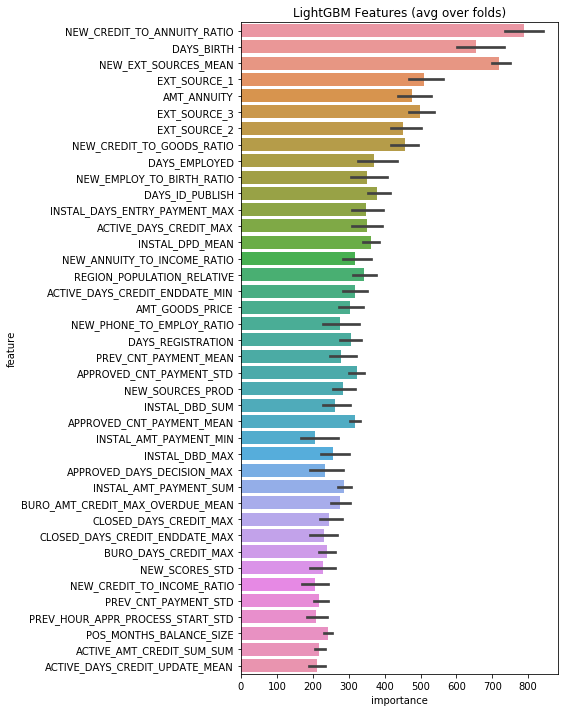

In [13]:
feat_importance, test_output = kfold_model(model_lgb, X_train, y_train, X_test, n_folds, stratified= True, debug= False)

In [28]:
sorted_Features = feat_importance[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)

In [44]:
important_featuress = list(sorted_Features[sorted_Features['importance'] > 50].index.values)

In [53]:
y_train2 = y_train
X_train2 = X_train[important_featuress]
X_test2 = df_test[important_featuress + ['TARGET']]

In [ ]:
feat_importance2, test_output2 = kfold_model(model_lgb, X_train2, y_train2, X_test2, n_folds, stratified= True, debug= False)

Training until validation scores don't improve for 200 rounds.
[100]	training's auc: 0.776111	valid_1's auc: 0.757843
[200]	training's auc: 0.797612	valid_1's auc: 0.772715
[300]	training's auc: 0.810754	valid_1's auc: 0.779415
[400]	training's auc: 0.820941	valid_1's auc: 0.783109
[500]	training's auc: 0.829848	valid_1's auc: 0.785498
[600]	training's auc: 0.837622	valid_1's auc: 0.786943
[700]	training's auc: 0.844453	valid_1's auc: 0.78773
[800]	training's auc: 0.850898	valid_1's auc: 0.788218
[900]	training's auc: 0.856886	valid_1's auc: 0.78871
[1000]	training's auc: 0.862659	valid_1's auc: 0.789097
[1100]	training's auc: 0.868164	valid_1's auc: 0.789344
[1200]	training's auc: 0.873351	valid_1's auc: 0.789626
[1300]	training's auc: 0.878294	valid_1's auc: 0.789759
[1400]	training's auc: 0.882994	valid_1's auc: 0.789755
[1500]	training's auc: 0.887616	valid_1's auc: 0.78981
[1600]	training's auc: 0.891959	valid_1's auc: 0.78989
[1700]	training's auc: 0.896129	valid_1's auc: 0.78989